In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import matplotlib.pyplot as plt
import numpy as np

import gw_utils as u
import qnm

In [4]:
path = '../sim_data/BBHMedRes/'

In [5]:
%ls ../sim_data/BBHMedRes/

BBHMedRes.par                        mp_psi4_l3_m2_r30.00.asc
TwoPunctures.bbh                     mp_psi4_l3_m2_r40.00.asc
carpet-grid-coordinates              mp_psi4_l3_m2_r50.00.asc
carpet-grid-structure                mp_psi4_l3_m2_r60.00.asc
carpet-timing..asc                   mp_psi4_l3_m3_r30.00.asc
carpetlib-memory-statistics          mp_psi4_l3_m3_r40.00.asc
mp_psi4_l2_m-1_r30.00.asc            mp_psi4_l3_m3_r50.00.asc
mp_psi4_l2_m-1_r40.00.asc            mp_psi4_l3_m3_r60.00.asc
mp_psi4_l2_m-1_r50.00.asc            mp_psi4_l4_m-1_r30.00.asc
mp_psi4_l2_m-1_r60.00.asc            mp_psi4_l4_m-1_r40.00.asc
mp_psi4_l2_m-2_r30.00.asc            mp_psi4_l4_m-1_r50.00.asc
mp_psi4_l2_m-2_r40.00.asc            mp_psi4_l4_m-1_r60.00.asc
mp_psi4_l2_m-2_r50.00.asc            mp_psi4_l4_m-2_r30.00.asc
mp_psi4_l2_m-2_r60.00.asc            mp_psi4_l4_m-2_r40.00.asc
mp_psi4_l2_m0_r30.00.asc             mp_psi4_l4_m-2_r50.00.asc
mp_psi4_l2_m0_r40.00.asc             mp_psi4_l4_m-2_r60.00.asc


## ADM

In [6]:
u.get_ADM_param(path)

{'M_i': 0.9846180235445987,
 'J_i': 0.8284800000000001,
 'M_f': 0.95202568850286,
 'J_f': 0.624475776063923,
 'D': 6.0}

## trajectories

In [7]:
t, traj1, traj2 = u.get_trajectories(path)

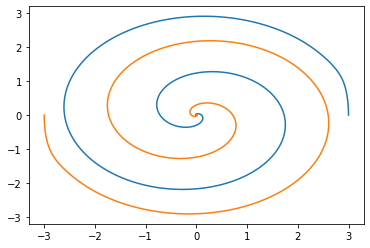

In [8]:
plt.plot(*traj1)
plt.plot(*traj2)

## waves

In [9]:
psi4_22 = u.read_psi4(path, '50.00', lm = (2,2))

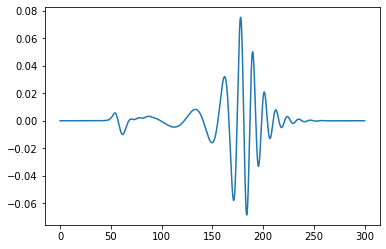

In [10]:
plt.plot(psi4_22[0], psi4_22[1].real)

In [11]:
h_22 = u.calc_ffi(path, '50.00', lm = (2,2), f0 = 0.01)

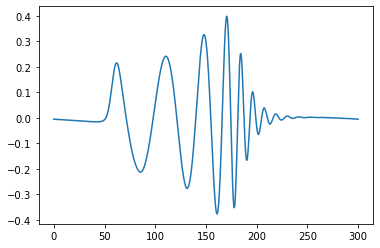

In [12]:
plt.plot(h_22[0], h_22[1].real)

In [13]:
psi4_44 = u.read_psi4(path, '50.00', lm = (4,4))

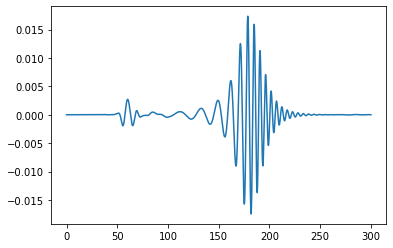

In [14]:
plt.plot(psi4_44[0], psi4_44[1].real)

## QNMs

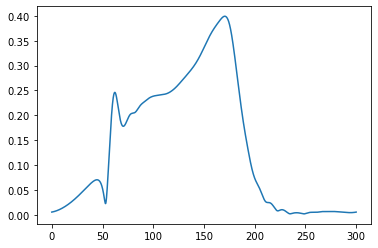

In [56]:
plt.plot(h_22[0], np.abs(h_22[1]))

In [57]:
idx_mrg = np.argmax(np.abs(h_22[1]))
h_22[0][idx_mrg]

170.519531

In [60]:
condition = (180 < h_22[0]) & (h_22[0] < 230)
t_rd, h_22_rd = h_22[0][condition], h_22[1][condition]

In [61]:
from scipy.signal import find_peaks

In [62]:
h_log = np.log(np.abs(h_22_rd.real))

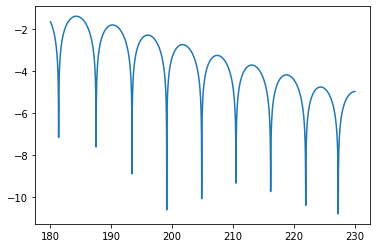

In [63]:
plt.plot(t_rd, h_log)

In [64]:
idx_peaks = find_peaks(h_log)[0]

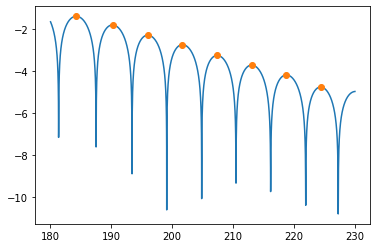

In [65]:
plt.plot(t_rd, h_log)
plt.plot(t_rd[idx_peaks], h_log[idx_peaks], 'o')

In [91]:
t_peaks = t_rd[idx_peaks]
dts = [t_peaks[i+1] - t_peaks[i] for i in range(len(t_peaks)-1)]    
dt_ave = np.average(dts)

In [92]:
np.pi/dt_ave

0.5480660081028923

In [93]:
np.polyfit(t_rd[idx_peaks], h_log[idx_peaks], 1)

array([-0.08405262, 14.1766884 ])

In [95]:
adm = u.get_ADM_param(path)

In [96]:
af = adm['J_f']/adm['M_f']**2
af

0.6889984774061652

In [97]:
grav_qnm = qnm.modes_cache(s=-2, l=2, m=2, n=0)
omega, _, _ = grav_qnm(a = af)

In [98]:
omega

(0.5277896716873988-0.08119821149147363j)